In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [2]:
datos_antigua = pd.read_csv("datos_antigua.csv", delimiter=",")
datos_nueva = pd.read_csv("datos_nueva.csv", delimiter=",")

In [3]:
def normalizar(d_frame):
    for column in d_frame.keys()[2:]:
        if not sum(d_frame[column]) == 0:
            d_frame[column] = (d_frame[column] - np.average(d_frame[column]))/np.std(d_frame[column])
    #fin for
#fin función

In [4]:
normalizar(datos_antigua)
normalizar(datos_nueva)
datos_nueva.head()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,eig_20,eig_21,eig_22,eig_23
0,0.0,0.0,-0.755343,0.291296,-0.480268,1.257049,-0.562555,-0.562060,0.0,0.0,...,0.561929,0.491745,0.828282,0.789524,0.739333,0.930312,0.871956,0.834209,1.096450,1.006269
1,0.0,1.0,-0.947375,0.087579,0.078063,-1.685256,-0.493197,-0.404944,0.0,0.0,...,-0.511439,-0.520225,-0.553899,-0.512112,-0.427598,-0.449149,-0.487687,-0.476809,-0.381804,-0.389049
2,2.0,0.0,2.362355,-0.660007,-0.707477,1.693210,-0.378567,-0.544676,0.0,0.0,...,-1.023257,-1.010082,-0.982793,-0.997429,-0.997816,-0.991515,-0.985369,-0.986271,-0.960870,-0.941588
3,0.0,0.0,-1.060887,-0.021284,0.670529,0.327320,-0.535580,-0.444901,0.0,0.0,...,0.108598,0.129361,0.116017,0.166758,0.150405,0.147950,0.382340,0.408826,0.425595,0.373440
4,1.0,1.0,0.984403,-1.196377,0.988778,1.588110,-0.431884,-0.413545,0.0,0.0,...,-0.878154,-0.877047,-0.886330,-0.855246,-0.853633,-0.822893,-0.845323,-0.834547,-0.858852,-0.845952


In [21]:
# Para X tomaré N frecuencias (dadas po el usuario). Para "y" tomaré un CXX dado por el usuario
def info_mutua(N_freq, Cobj, d_frame):
    if any("(omega^2)" in x for x in d_frame.keys()):
        key_str = "(omega^2)"
        N_col = 6
    elif any("eig" in x for x in d_frame.keys()):
        key_str = "eig"
        N_col = 5
    else:
        raise KeyError("No hay columnas llamadas eig_X o (omega^2)_X")
    #fin if 
    lista_ini = list(d_frame.keys()[:N_col])
    lista_eig = list(filter(lambda x: key_str in x, d_frame.keys()))[:N_freq]
    lista_X = lista_ini + lista_eig
    X = d_frame[lista_X]
    y = d_frame[Cobj]
    resp = mutual_info_regression(X, y, discrete_features=(0,1))
    return (resp, lista_X)
#fin función

In [32]:
N_freq = 24
target = "C00"
MI_antigua_info = info_mutua(N_freq, target, datos_antigua)
MI_nueva_info = info_mutua(N_freq, target, datos_nueva)
MI_antigua = MI_antigua_info[0]
MI_nueva = MI_nueva_info[0]
listaX_antigua = MI_antigua_info[1]
listaX_nueva = MI_nueva_info[1]

['# Shape', 'Cry_st', 'Density', 'Lx', 'Ly', 'Lz', '(omega^2)_0', '(omega^2)_1', '(omega^2)_2', '(omega^2)_3', '(omega^2)_4', '(omega^2)_5', '(omega^2)_6', '(omega^2)_7', '(omega^2)_8', '(omega^2)_9', '(omega^2)_10', '(omega^2)_11', '(omega^2)_12', '(omega^2)_13', '(omega^2)_14', '(omega^2)_15', '(omega^2)_16', '(omega^2)_17', '(omega^2)_18', '(omega^2)_19', '(omega^2)_20', '(omega^2)_21', '(omega^2)_22', '(omega^2)_23']
[0.00256345 0.         0.         0.         0.00498557 0.
 0.00333694 0.         0.01750499 0.00344444 0.         0.
 0.         0.         0.00505193 0.         0.         0.
 0.00661786 0.00312724 0.01881519 0.00642648 0.00620476 0.02047409
 0.01280337 0.00919967 0.00790481 0.01328361 0.0167913  0.00630934]


<BarContainer object of 30 artists>

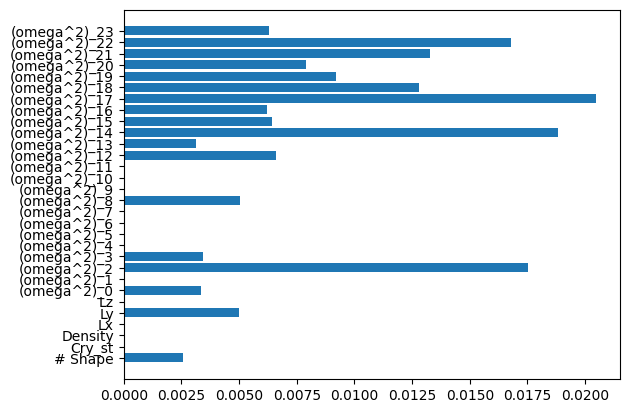

In [33]:
print(listaX_antigua)
print(MI_antigua)
plt.barh(listaX_antigua, MI_antigua)

['# Shape', 'Cry_st', 'bx', 'by', 'bz', 'eig_0', 'eig_1', 'eig_2', 'eig_3', 'eig_4', 'eig_5', 'eig_6', 'eig_7', 'eig_8', 'eig_9', 'eig_10', 'eig_11', 'eig_12', 'eig_13', 'eig_14', 'eig_15', 'eig_16', 'eig_17', 'eig_18', 'eig_19', 'eig_20', 'eig_21', 'eig_22', 'eig_23']
[0.00247999 0.         0.00012972 0.0052646  0.         0.
 0.00893233 0.01220692 0.00545292 0.01035364 0.00583998 0.02706484
 0.01390295 0.01072243 0.01437508 0.015228   0.0153506  0.02420163
 0.01958933 0.01815085 0.02432671 0.03158155 0.02066632 0.01486678
 0.00216595 0.0319742  0.03749634 0.02288458 0.02548497]


<BarContainer object of 29 artists>

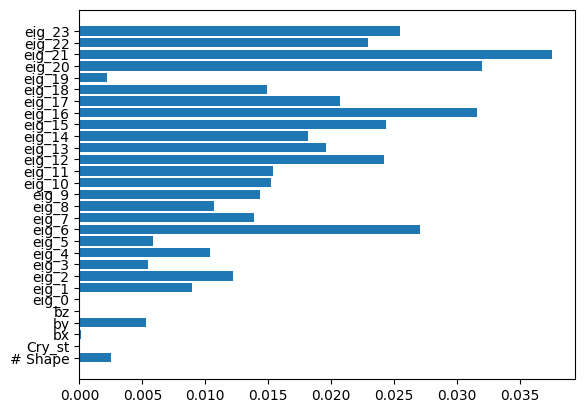

In [34]:
print(listaX_nueva)
print(MI_nueva)
plt.barh(listaX_nueva, MI_nueva)